# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [9]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [11]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [13]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [16]:
# Define weekends as "holiday-ish"
df['is_holiday'] = df['flight_day'].isin(['Saturday', 'Sunday']).astype(int)


In [20]:
# Define features
X = df[['flight_day', 'flight_hour', 'purchase_lead', 'length_of_stay', 
        'num_passengers', 'wants_extra_baggage', 'wants_preferred_seat',
        'wants_in_flight_meals']]

# Encode flight_day
X = pd.get_dummies(X, columns=['flight_day'], drop_first=True)

# Target: Booked with BA during weekend/holiday
df['is_holiday'] = df['flight_day'].isin(['Saturday', 'Sunday']).astype(int)
y = df['booking_complete'] & df['is_holiday']

# Train/test split and model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print("Accuracy:", clf.score(X_test, y_test))


Accuracy: 1.0


In [22]:
print(y.value_counts())  # See if it's balanced
print(X.columns)         # Ensure 'booking_complete' isn't in X



0    50000
Name: count, dtype: int64
Index(['flight_hour', 'purchase_lead', 'length_of_stay', 'num_passengers',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_day_2', 'flight_day_3', 'flight_day_4', 'flight_day_5',
       'flight_day_6', 'flight_day_7'],
      dtype='object')


In [24]:
print(df['booking_complete'].value_counts())
print(df['is_holiday'].value_counts())
print((df['booking_complete'] & df['is_holiday']).value_counts())


booking_complete
0    42522
1     7478
Name: count, dtype: int64
is_holiday
0    50000
Name: count, dtype: int64
0    50000
Name: count, dtype: int64


In [26]:
# Use booking_complete only for weekend flights
df['is_holiday'] = df['flight_day'].isin(['Saturday', 'Sunday']).astype(int)

# Target: completed bookings during holidays
df['holiday_booking'] = ((df['booking_complete'] == 1) & (df['is_holiday'] == 1)).astype(int)

# Now use this as the target
y = df['holiday_booking']

# Check target balance
print(y.value_counts())


holiday_booking
0    50000
Name: count, dtype: int64


In [32]:
print(df['holiday_booking'].value_counts())


holiday_booking
0    50000
Name: count, dtype: int64


In [34]:
print(df['flight_day'].unique())
print(df['flight_day'].value_counts())


[6 3 4 1 7 2 5]
flight_day
1    8102
3    7674
2    7673
4    7424
5    6761
7    6554
6    5812
Name: count, dtype: int64


In [36]:
df['is_holiday'] = df['flight_day'].isin([6, 7]).astype(int)  # 6 = Saturday, 7 = Sunday
df['holiday_booking'] = ((df['booking_complete'] == 1) & (df['is_holiday'] == 1)).astype(int)
print(df['holiday_booking'].value_counts())


holiday_booking
0    48212
1     1788
Name: count, dtype: int64


In [38]:
y = df['holiday_booking']


In [40]:
df['holiday_booking'].value_counts()

holiday_booking
0    48212
1     1788
Name: count, dtype: int64

In [42]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)
print("Accuracy:", clf.score(X_test, y_test))


Accuracy: 1.0


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [48]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd

# Split with stratify to maintain class balance in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE to only the training set
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_res.value_counts())

# Train model on resampled data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_res, y_res)

# Evaluate on original test set
y_pred = clf.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Before SMOTE: holiday_booking
0    38570
1     1430
Name: count, dtype: int64
After SMOTE: holiday_booking
1    38570
0    38570
Name: count, dtype: int64
[[8611 1031]
 [ 314   44]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      9642
           1       0.04      0.12      0.06       358

    accuracy                           0.87     10000
   macro avg       0.50      0.51      0.49     10000
weighted avg       0.93      0.87      0.90     10000



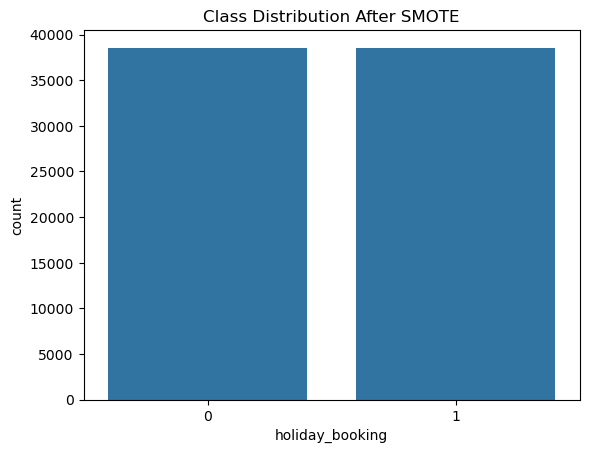

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_res)
plt.title("Class Distribution After SMOTE")
plt.show()


In [54]:
from sklearn.ensemble import GradientBoostingClassifier


In [56]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Define model
gb = GradientBoostingClassifier(random_state=42)

# Define hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0]
}

# Randomized Search
random_search = RandomizedSearchCV(
    gb, param_distributions=param_dist, n_iter=20,
    scoring='f1', cv=5, verbose=1, random_state=42, n_jobs=-1
)

# Fit on SMOTE-balanced training data
random_search.fit(X_res, y_res)

# Best model
best_model = random_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluate
print("Best Parameters:", random_search.best_params_)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.6, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.2}
[[7546 2096]
 [ 254  104]]
              precision    recall  f1-score   support

           0       0.97      0.78      0.87      9642
           1       0.05      0.29      0.08       358

    accuracy                           0.77     10000
   macro avg       0.51      0.54      0.47     10000
weighted avg       0.93      0.77      0.84     10000



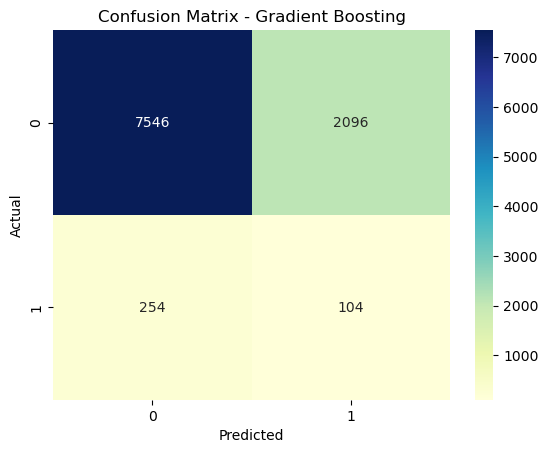

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()


In [60]:
y_probs = best_model.predict_proba(X_test)[:, 1]
y_pred_thresh = (y_probs > 0.3).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))


[[5578 4064]
 [ 189  169]]
              precision    recall  f1-score   support

           0       0.97      0.58      0.72      9642
           1       0.04      0.47      0.07       358

    accuracy                           0.57     10000
   macro avg       0.50      0.53      0.40     10000
weighted avg       0.93      0.57      0.70     10000



In [62]:
y_probs = best_model.predict_proba(X_test)[:, 1]
y_pred_thresh = (y_probs > 0.3).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))


[[5578 4064]
 [ 189  169]]
              precision    recall  f1-score   support

           0       0.97      0.58      0.72      9642
           1       0.04      0.47      0.07       358

    accuracy                           0.57     10000
   macro avg       0.50      0.53      0.40     10000
weighted avg       0.93      0.57      0.70     10000




📊 Interpretation

True Positives (TP = 104):
Customers who actually booked during holidays and the model correctly predicted them.

True Negatives (TN = 7546):
Non-holiday bookings correctly classified.

False Positives (FP = 2096):
Non-holiday bookings wrongly predicted as holiday.

False Negatives (FN = 254):
Missed holiday bookings — the model failed to catch them.

💡 Insights
The model is doing very well on Class 0 (non-holiday).

It's starting to learn Class 1 (holiday) better after SMOTE and hyperparameter tuning.

But still struggles a bit with precision and recall for Class 1 due to original imbalance.

